## 1. Install the Quandl library and register for a Quandl account as described in the Exercise.

In [1]:
#import libraries 
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#path to project
path = r'/Users/libertyonia/Documents/Covid'

In [3]:
#import cleaned data 
#my original data is already a time series data
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','Ach6_T4_data.csv'))

In [4]:
#check the data
df.head()

,Unnamed: 0,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,daily_deaths,daily_cases,month,year
0,2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
1,3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
2,4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
3,5,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-27,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
4,6,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-28,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020


In [5]:
#drop the Unnamed: 0 column 
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
#check for mixtypes 
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
#no mixed datatypes 

In [7]:
#check missing values 
df.isnull().sum()
#no missing 

county_code          0
county               0
state                0
lat                  0
long                 0
date                 0
cases                0
state_code           0
deaths               0
male                 0
female               0
median_age           0
population           0
female_percentage    0
region               0
daily_deaths         0
daily_cases          0
month                0
year                 0
dtype: int64

In [8]:
#check for duplicates 
df = df.drop_duplicates()
#no duplicates 

## 2. Find a data set to work and import it into your Jupyter notebook. 
My original data is a time series

## 3. Make a subset of your data set if necessary.

### The reason why I created a subset
I decided to create a subset of the data, because the original data holds observations per day for each U.S county. I believe the line chart would be really busy if I included daily dates from 2020 - 2023. I created a subset grouping the data according to monthly and yearly data. This would reduce the amount of dates that I will investigate. 

In [9]:
#count the number of columns and rows in the dataframe
df.shape

(3389139, 19)

In [10]:
#check column names 
df.columns.to_list()

['county_code',
 'county',
 'state',
 'lat',
 'long',
 'date',
 'cases',
 'state_code',
 'deaths',
 'male',
 'female',
 'median_age',
 'population',
 'female_percentage',
 'region',
 'daily_deaths',
 'daily_cases',
 'month',
 'year']

In [11]:
#create an aggregate 
agg = {
 'state': 'first',
 'male':'first',
 'female':'first',
 'population':'first',
 'region':'first',
    'lat':'first',
 'long':'first',
 'daily_deaths':'sum',
 'daily_cases':'sum',
}

In [12]:
#create a subset for grouping months and year 
df = df.groupby(['month','year','county']).agg(agg)

In [13]:
df.head()

state    male  female  population   region  \
month year county                                                           
1     2020 Abbeville  South Carolina   11966   12691       24657    South   
           Acadia          Louisiana   30491   32077       62568    South   
           Accomack         Virginia   15861   16881       32742    South   
           Ada                 Idaho  223367  222685      446052     West   
           Adair                Iowa    3516    3608        7124  Midwest   

                            lat        long  daily_deaths  daily_cases  
month year county                                                       
1     2020 Abbeville  34.223334  -82.461707           0.0          0.0  
           Acadia     30.295065  -92.414197           0.0          0.0  
           Accomack   37.767072  -75.632346           0.0          0.0  
           Ada        43.452658 -116.241552           0.0          0.0  
           Adair      41.330756  -94.471059           0.0          0.0

In [14]:
#reset index of the dataframe 
df_sub = pd.DataFrame(df.reset_index())

In [15]:
#check the subset 
df_sub.head()

,month,year,county,state,male,female,population,region,lat,long,daily_deaths,daily_cases
0,1,2020,Abbeville,South Carolina,11966,12691,24657,South,34.223334,-82.461707,0.0,0.0
1,1,2020,Acadia,Louisiana,30491,32077,62568,South,30.295065,-92.414197,0.0,0.0
2,1,2020,Accomack,Virginia,15861,16881,32742,South,37.767072,-75.632346,0.0,0.0
3,1,2020,Ada,Idaho,223367,222685,446052,West,43.452658,-116.241552,0.0,0.0
4,1,2020,Adair,Iowa,3516,3608,7124,Midwest,41.330756,-94.471059,0.0,0.0


In [16]:
#combine the month and year columns into a new column 
df_sub['Month_Year'] = df_sub['month'].astype(str) + '-' + df_sub['year'].astype(str)

In [17]:
#check the new column 
df_sub

,month,year,county,state,male,female,population,region,lat,long,daily_deaths,daily_cases,Month_Year
0,1,2020,Abbeville,South Carolina,11966,12691,24657,South,34.223334,-82.461707,0.0,0.0,1-2020
1,1,2020,Acadia,Louisiana,30491,32077,62568,South,30.295065,-92.414197,0.0,0.0,1-2020
2,1,2020,Accomack,Virginia,15861,16881,32742,South,37.767072,-75.632346,0.0,0.0,1-2020
3,1,2020,Ada,Idaho,223367,222685,446052,West,43.452658,-116.241552,0.0,0.0,1-2020
4,1,2020,Adair,Iowa,3516,3608,7124,Midwest,41.330756,-94.471059,0.0,0.0,1-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69839,12,2022,Yukon-Koyukuk,Alaska,2910,2505,5415,West,65.508155,-151.390739,0.0,14.0,12-2022
69840,12,2022,Yuma,Arizona,106973,100856,207829,West,32.768957,-113.906667,5.0,1207.0,12-2022
69841,12,2022,Zapata,Texas,7177,7192,14369,South,27.001564,-99.169872,0.0,41.0,12-2022
69842,12,2022,Zavala,Texas,6208,5923,12131,South,28.866172,-99.760508,0.0,48.0,12-2022


In [18]:
#convert 'Month_Year' column to datetime format
df_sub['Month_Year'] = pd.to_datetime(df_sub['Month_Year'], format='%m-%Y')

In [19]:
#check the new datatype for month_year column 
df_sub.dtypes

month                    int64
year                     int64
county                  object
state                   object
male                     int64
female                   int64
population               int64
region                  object
lat                    float64
long                   float64
daily_deaths           float64
daily_cases            float64
Month_Year      datetime64[ns]
dtype: object

In [20]:
#rename the daily_cases and daily_deaths columns 
df_sub.rename(columns = {'daily_deaths' : 'deaths'}, inplace = True)
df_sub.rename(columns = {'daily_cases' : 'cases'}, inplace = True)

In [21]:
#check new columns name 
df_sub.columns.to_list()

['month',
 'year',
 'county',
 'state',
 'male',
 'female',
 'population',
 'region',
 'lat',
 'long',
 'deaths',
 'cases',
 'Month_Year']

In [22]:
#export df_sub time series
df_sub.to_csv(os.path.join(path,'02 Data','Prepared Data','monthly_covid_time_series.csv'))

## 4. Create a line chart of your data.

In [23]:
#create a subset containing the date and cases
#this shows total U.S. cases throughout each month 
df_cases = df_sub.groupby(['Month_Year']).agg({'cases':sum})

Text(0.5, 1.0, 'Monthly U.S. Covid-19 Cases')

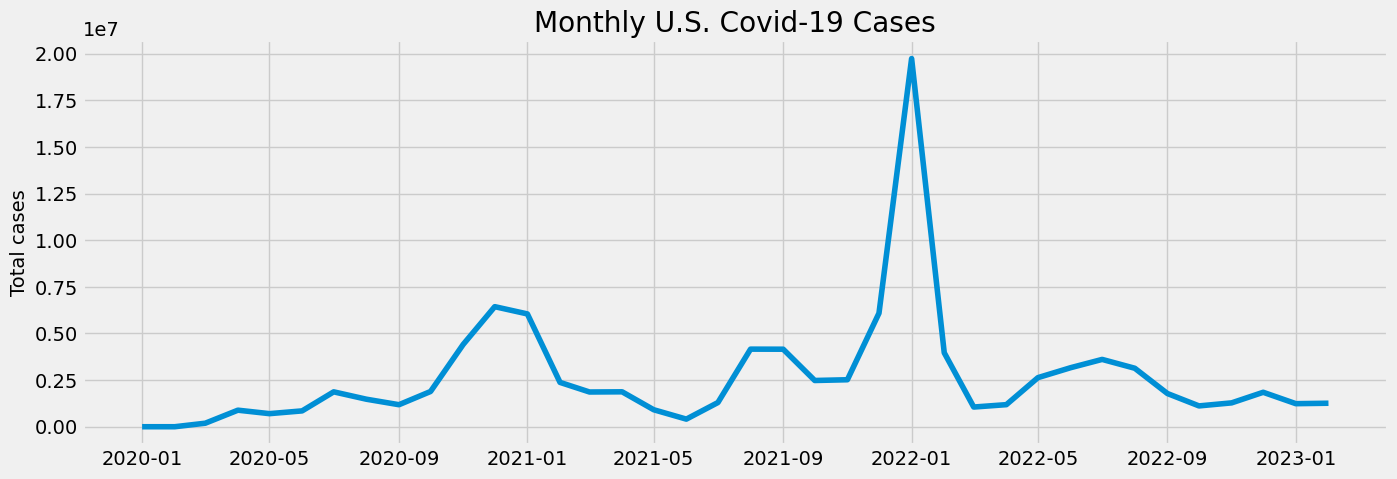

In [24]:
#plot line chart using matplotlib 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_cases)
plt.ylabel('Total cases')
plt.title('Monthly U.S. Covid-19 Cases')

In [25]:
#create a subset containing the date and deaths 
df_deaths = df_sub.groupby(['Month_Year']).agg({'deaths':sum})

Text(0, 0.5, 'Total mortality')

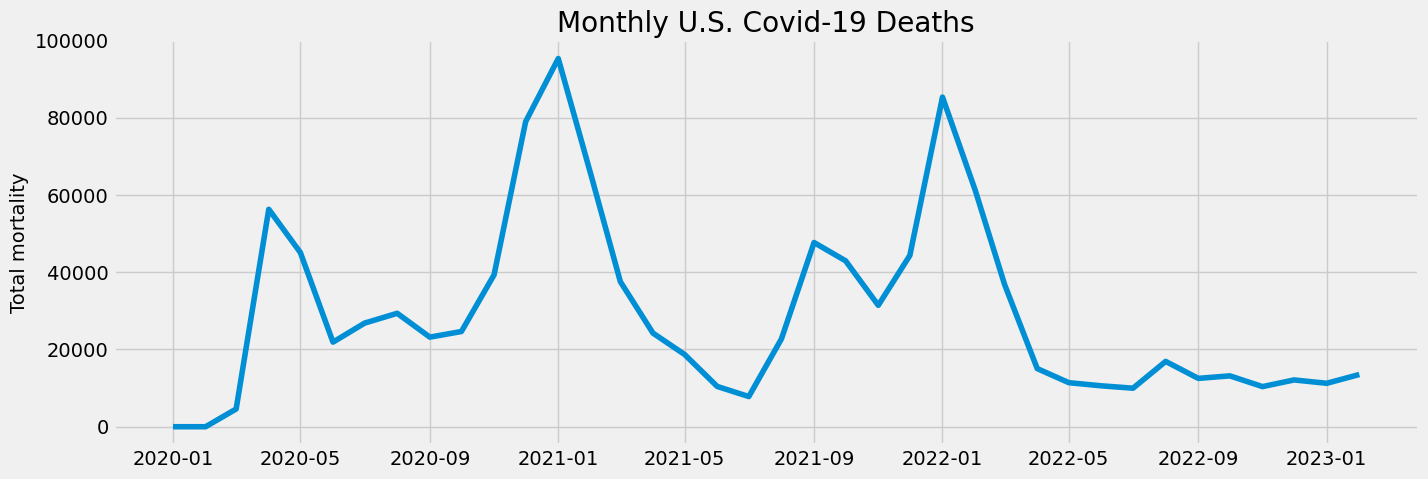

In [26]:
#plot line chart using matplotlib 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_deaths)
plt.title('Monthly U.S. Covid-19 Deaths')
plt.ylabel('Total mortality')

## 5. Decompose the data’s components.
- Analyze the results from the plot in a markdown cell.

In [27]:
#decompose the cases time series

decomp_cases = sm.tsa.seasonal_decompose(df_cases, model='additive')

In [28]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

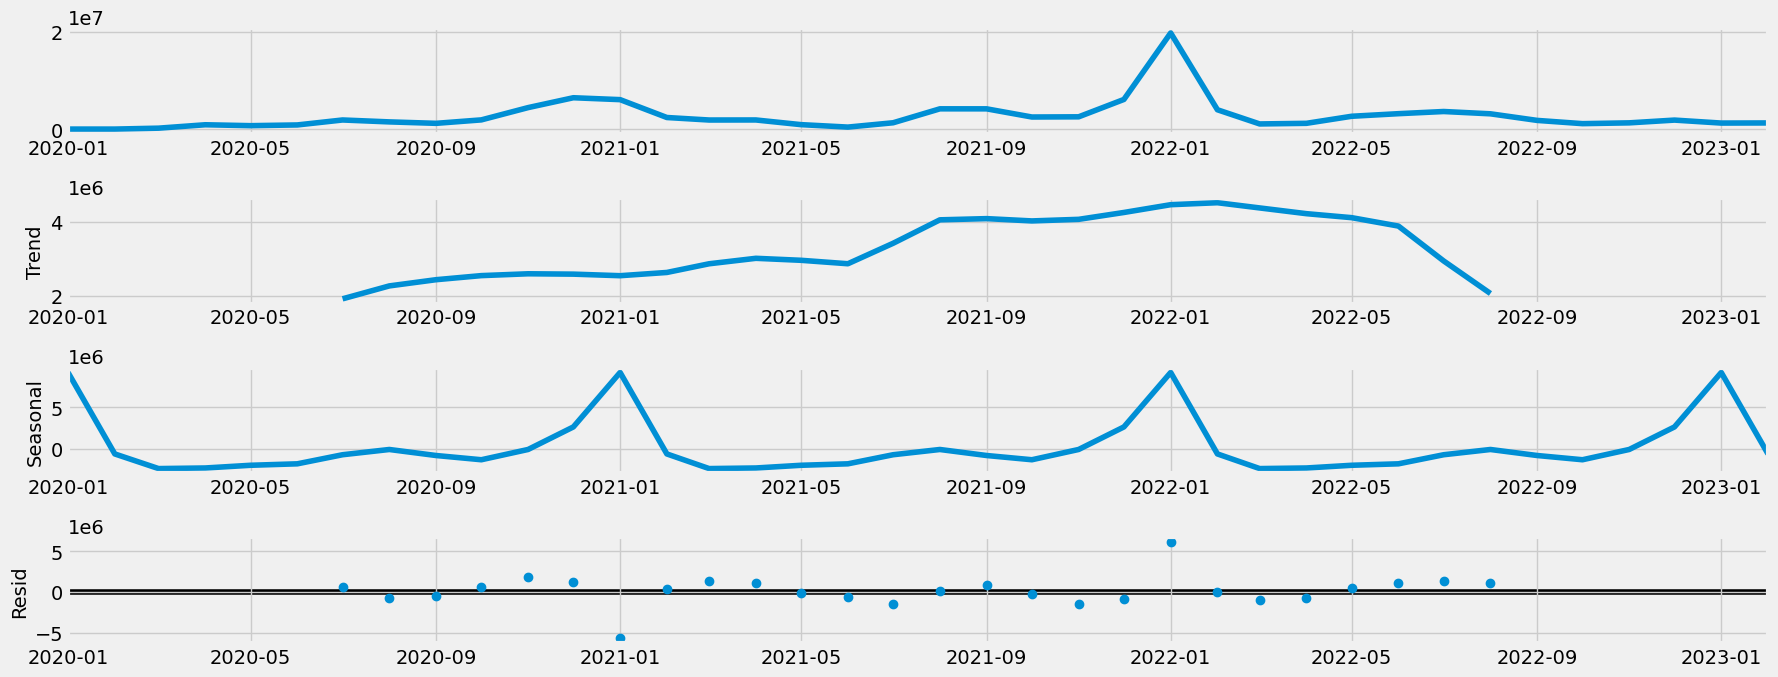

In [29]:
#plot the separate components

decomp_cases.plot()
plt.show()

### Decomposition of cases time series
The second graph shows the trend of the original time series. The time series increases from May 2020 to January 2022. This make sense, because there is a large spike in Covid-19 cases in January 2022. This may be due to the spread of the Omicron variant during the winter of 2021 to 2022. 

The third graph shows seasonality. There is an increase of covid cases every January. This makes sense, because more people are indoors and spend more time at holiday celebrations. This may increase the spread of the virus. 

The fourth graph shows noise. There is noise in the time series around September 2020 to September 2022. 

In [ ]:
#decompose the cases deaths series

decomp_deaths = sm.tsa.seasonal_decompose(df_deaths, model='additive')

In [ ]:
#plot the separate components

decomp_deaths.plot()
plt.show()

## Decomposition of death time series 
The second graph is the trend of the original data. In general, there is a decrease in deaths from September 2020 to September 2022. This is probably due to the implementation of vaccines. 

The third graph shows the seasonality of the time series. Mortality peak in January during the winter. This make sense, because people are more likely to be indoors and at holiday celebrations. This can increase the exposure to Covid-19. 

The fourth graph shows that there is noise from around May 2020 to September 2022. 

## 6. Conduct a Dickey-Fuller test to check for stationarity.
- Interpret the results in a markdown cell and reference your null hypothesis.

In [ ]:
#import aduller function 
from statsmodels.tsa.stattools import adfuller 

In [ ]:
#define the function that performs the Dickey-Fuller test
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Run a Dickey-Fuller Test

In [ ]:
#apply the function to the cases time series 
dickey_fuller(df_cases['cases'])

## Dickey-Fuller test on the cases time series 
The null hypothesis is that the cases time series has a unit root and is not stationary. The alternative hypothesis is that the time series is stationary. 

The test statistic is -4.06 and the critical value (5%) is -2.94. The test statistic is lower than the critical value, therefore, we can reject the null hypothesis. The the daily cases time series has stationarity. The p-value is 0.001093 which is less than 0.05, so this observation is significant. 

# Run a Dickey-Fuller test on the deaths time series 

In [ ]:
#apply the function to the deaths time series 
dickey_fuller(df_deaths['deaths'])

## Dickey-Fuller test on the deaths time series 
The null hypothesis is that the death time series has a unit root and is not stationary. The alternative hypothesis is that the time series is stationary. 

The test statistic is -3.771457 and the critical value (5%) is -2.945951. The test statstic is smaller than the critical value, which means that the null hypothesis can be rejected. The deaths time series is stationary. The p-value is 0.003213 which is less than 0.05. Therefore, the result is significant. 

## 7-8. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
Both data series are stationary when running the Dickey-Fuller test.

## 9. Check your data’s autocorrelations.

In [ ]:
#check plot of autocorrelations for cases time series

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_cases)
plt.show()

In [ ]:
#check plot of autocorrelations for deaths time series

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_deaths)
plt.show()